# Perceptron

Adapted from S. Raschka & V. Mirjalili's Python Machine Learning.

The perceptron is a binary classifier, where the activation function is a unit step function:

$$ \phi(z) = \Big\{ 
    \begin{array}{ll} 
        1 & \text{if } z \geq 0 \\ 
        -1 & \text{otherwise} 
    \end{array} ,
$$
and the net input is a linear combination of the input: $z = w.x$.

Alternatively, we have the Adaline rule, where the net input is linear, and the activation function is the identity function.

At each iteration, the weights $w$ are updated according to
$$ w \mapsto w + \eta (y - \phi(z))x, $$
where $\eta$ is the learning rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# import iris dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# get different info from the dataset
data = np.array(iris['data'])  # data
target = np.array(iris['target'])  # classifications

n_samples = data.shape[0]
n_features = data.shape[1]

target_names = iris['target_names']
feature_names = iris['feature_names']

In [5]:
data.shape, target.shape

((150, 4), (150,))

In [6]:
from ml.utils import scale_features, shuffle_training_examples

In [7]:
# normalise the features
data = scale_features(data)

### Step function as the activation function

In [8]:
# import Perceptron class
from ml.linear_classifier import Perceptron

In [9]:
perceptron_step = Perceptron(random_state=1)

In [10]:
# create a binary classifier for iris type = 0
y = np.where(target == 0, 1, -1)
# use fit stochastic to update the weights one sample at a time
cost_per_iteration = perceptron_step.fit_stochastic(data, y, n_iterations=10, learning_rate=0.01)

In [11]:
cost_per_iteration

[93, 0, 0, 0, 0, 0, 0, 0, 0, 0]

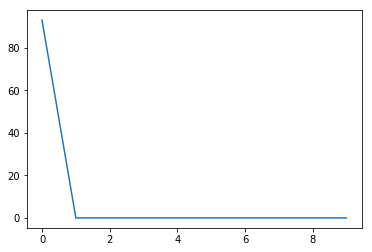

In [12]:
plt.plot(cost_per_iteration)

### Identity function as activation function

In [13]:
# import PerceptronAdaline class
from ml.linear_classifier import PerceptronAdaline

In [14]:
perceptron_adaline = PerceptronAdaline(random_state=1)

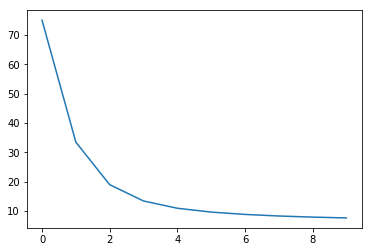

In [15]:
# by default model is fitted by updating all weights simultaneously
cost_per_iteration = perceptron_adaline.fit(data, y, n_iterations=10, learning_rate=0.001)
plt.plot(cost_per_iteration)

In [16]:
print("n errors: %i" % (perceptron_adaline.predict(data) - y != 0).sum())

n errors: 0


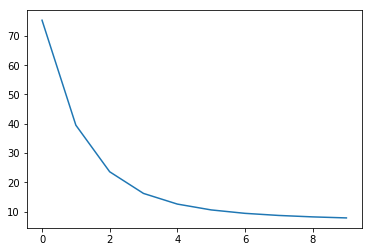

In [17]:
# use fit stochastic to update the weights one sample at a time
cost_per_iteration = perceptron_adaline.fit_stochastic(data, y, 10, 0.001)
plt.plot(cost_per_iteration)

In [18]:
print("n errors: %i" % (perceptron_adaline.predict(data) - y != 0).sum())

n errors: 0


### Using both training and test sets

In [19]:
# shuffle the training data, not forgetting to keep the data and its classification aligned
shuffled_data, shuffled_target = shuffle_training_examples(data, target)
shuffled_data[:5], shuffled_target[:5]

(array([[-0.05250608, -0.59237301,  0.76275827,  1.58046376],
        [-1.50652052,  1.24920112, -1.56757623, -1.3154443 ],
        [ 0.55333328, -0.36217625,  1.0469454 ,  0.79067065],
        [ 1.64384411,  1.24920112,  1.33113254,  1.71209594],
        [-0.65834543,  1.47939788, -1.2833891 , -1.3154443 ]]),
 array([2., 0., 2., 2., 0.]))

In [20]:
# create a binary classifier for iris type = 0
shuffled_y = np.where(shuffled_target == 0, 1, -1)

In [21]:
n_training = 75

training_set = shuffled_data[:n_training,:]
training_y = shuffled_y[:n_training]

test_set = shuffled_data[n_training:,:]
test_y = shuffled_y[n_training:]

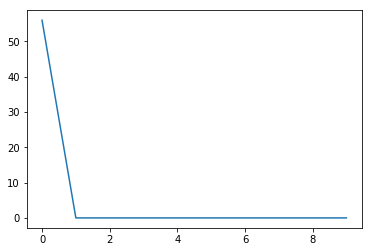

In [22]:
# train perceptron with the step activation function
cost_per_iteration = perceptron_step.fit(training_set, training_y, 10, 0.01)
plt.plot(cost_per_iteration)

In [23]:
print("n errors in train: %i" % (perceptron_step.predict(training_set) - training_y != 0).sum())
print("n errors in test: %i" % (perceptron_step.predict(test_set) - test_y != 0).sum())

n errors in train: 0
n errors in test: 0


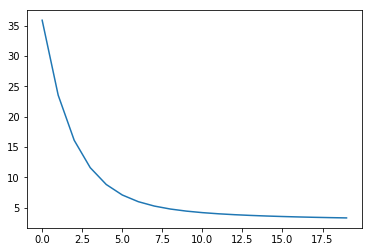

In [24]:
# train perceptron with the step activation function
cost_per_iteration = perceptron_adaline.fit(training_set, training_y, 20, 0.001)
plt.plot(cost_per_iteration)

In [25]:
print("n errors in train: %i" % (perceptron_adaline.predict(training_set) - training_y != 0).sum())
print("n errors in test: %i" % (perceptron_adaline.predict(test_set) - test_y != 0).sum())

n errors in train: 0
n errors in test: 0


### Use scikit-learn

In [26]:
data = np.array(iris['data']) 
target = np.array(iris['target'])

In [27]:
# create test and train datasets
from sklearn.model_selection import train_test_split

# the random state argument is the seed for the shuffling of the data
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1, stratify=target)

In [28]:
# the stratify argument ensures that the class balance of the training data matches the dataset as a whole
np.bincount(target), np.bincount(y_train), np.bincount(y_test)

(array([50, 50, 50]), array([35, 35, 35]), array([15, 15, 15]))

In [29]:
# normalise the features
from sklearn.preprocessing import StandardScaler

# mean and standard deviation are estimated from the training set, then applied to both training and test
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [30]:
# train a perceptron model
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
print("n errors in test: %i" % (ppn.predict(X_test_std) - y_test != 0).sum())

n errors in test: 3
